In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.api as sm

In [131]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df=pd.read_csv('diabetes.csv',header=0,names=col_names)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

In [181]:
X=df[['glucose','bp','bmi','age']]
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
x_train

,glucose,bp,bmi,age
357,129,0,39.9,44
73,129,86,35.1,23
352,61,82,34.4,46
497,81,72,30.1,25
145,102,75,0.0,21
...,...,...,...,...
71,139,64,28.6,26
106,96,122,22.4,27
270,101,86,45.6,38
435,141,0,42.4,29


In [188]:
x_train_opt = np.append(arr = np.ones((len(x_train),1)).astype(int), values =x_train, axis = 1) 
x_train_opt = x_train_opt[:,[1, 2, 3,4]] 
regressor_OLS = sm.OLS(endog = y_train, exog = x_train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  label   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.469
Method:                 Least Squares   F-statistic:                              128.3
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    4.06e-78
Time:                        18:38:48   Log-Likelihood:                         -326.83
No. Observations:                 576   AIC:                                      661.7
Df Residuals:                     572   BIC:                                      679.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0037      0.001      6.782      0.000       0.003       0.005
x2            -0.0053      0.001     -5.488      0.000      -0.007      -0.003
x3             0.0044      0.002      2.088      0.037       0.000       0.009
x4             0.0044      0.002      2.779      0.006       0.001       0.008
==============================================================================
Omnibus:                      341.683   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.822
Skew:                           0.585   Prob(JB):                     5.09e-15
Kurtosis:                       1.827   Cond. No.                         18.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [184]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[98, 25],
       [28, 41]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

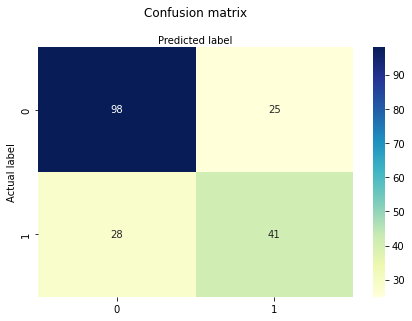

In [185]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [186]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print('Precision',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.7239583333333334
Precision 0.6212121212121212
Recall 0.5942028985507246


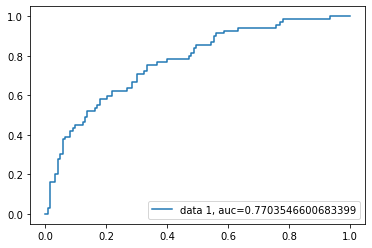

In [187]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()